# Correlation & Autocorrelation


In [2]:
import os

DATA_PATH = "../data/raw/"


In [4]:
# Import pandas and plotting modules
import pandas as pd
import matplotlib.pyplot as plt

diet = pd.read_csv(os.path.join(DATA_PATH, "diet.csv"), index_col=["Date"])

# Convert the date index to datetime
diet.index = pd.to_datetime(diet.index)


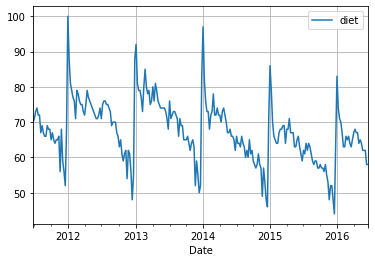

In [5]:
# From previous step
diet.index = pd.to_datetime(diet.index)

# Plot the entire time series diet and show gridlines
diet.plot(grid=True)
plt.show()


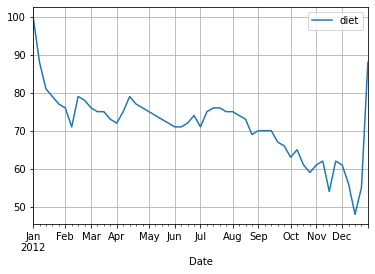

In [7]:
# From previous step
diet.index = pd.to_datetime(diet.index)

# Slice the dataset to keep only 2012
diet2012 = diet.loc["2012"]

# Plot 2012 data
diet2012.plot(grid=True)
plt.show()


In [8]:
stocks = pd.read_csv(
    os.path.join(DATA_PATH, "stocks.csv"),
    index_col=["observation_date"],
    parse_dates=["observation_date"],
)
bonds = pd.read_csv(
    os.path.join(DATA_PATH, "bonds.csv"),
    index_col=["observation_date"],
    parse_dates=["observation_date"],
)


In [9]:
# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)

# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how="inner")


{Timestamp('2007-11-12 00:00:00'), Timestamp('2012-10-08 00:00:00'), Timestamp('2015-11-11 00:00:00'), Timestamp('2016-10-10 00:00:00'), Timestamp('2011-10-10 00:00:00'), Timestamp('2008-11-11 00:00:00'), Timestamp('2010-10-11 00:00:00'), Timestamp('2015-10-12 00:00:00'), Timestamp('2011-11-11 00:00:00'), Timestamp('2008-10-13 00:00:00'), Timestamp('2017-06-09 00:00:00'), Timestamp('2016-11-11 00:00:00'), Timestamp('2013-10-14 00:00:00'), Timestamp('2014-10-13 00:00:00'), Timestamp('2010-11-11 00:00:00'), Timestamp('2009-11-11 00:00:00'), Timestamp('2014-11-11 00:00:00'), Timestamp('2013-11-11 00:00:00'), Timestamp('2007-10-08 00:00:00'), Timestamp('2012-11-12 00:00:00'), Timestamp('2009-10-12 00:00:00')}


Correlation of stocks and interest rates:  0.4119448886249272


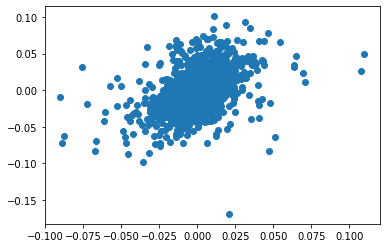

In [11]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()

# Compute correlation using corr()
correlation = returns["SP500"].corr(returns["US10Y"])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(returns["SP500"], returns["US10Y"])
plt.show()


<Figure size 1152x648 with 0 Axes>

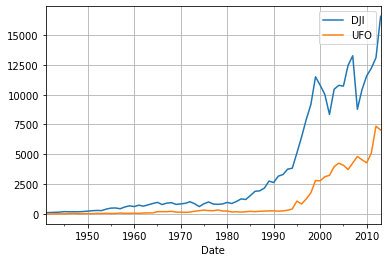

In [14]:
levels = pd.read_csv(
    os.path.join(DATA_PATH, "levels.csv"), index_col=["Date"], parse_dates=["Date"]
)
plt.figure(figsize=(16, 9))
levels.plot(grid=True)
plt.show()


In [15]:
# Compute correlation of levels
correlation1 = levels["DJI"].corr(levels["UFO"])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes["DJI"].corr(changes["UFO"])
print("Correlation of changes: ", correlation2)


Correlation of levels:  0.9399762210726432
Correlation of changes:  0.06026935462405376


In [19]:
_ = pd.read_csv(os.path.join(DATA_PATH, "dataframe.csv"))
x = _["x"]
y = _["y"]


In [20]:
# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" % (correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=["x"])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())


/usr/lib/python3/dist-packages/cvxopt/__init__.py:136: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if val is 0: val = None


The correlation between x and y is -0.90
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     4471.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:27:18   Log-Likelihood:                -560.10
No. Observations:                1000   AIC:                             1124.
Df Residuals:                     998   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

In [21]:
MSFT = pd.read_csv(
    os.path.join(DATA_PATH, "MSFT.csv"), index_col=["Date"], parse_dates=["Date"]
)


In [22]:
# Convert the daily data to weekly data
MSFT = MSFT.resample("W").last()

# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns["Adj Close"].autocorr()
print("The autocorrelation of weekly returns is %4.2f" % (autocorrelation))


The autocorrelation of weekly returns is -0.16


In [23]:
daily_rates = pd.read_csv(
    os.path.join(DATA_PATH, "daily_rates.csv"), index_col=["DATE"], parse_dates=["DATE"]
)


In [24]:
# Compute the daily change in interest rates
daily_diff = daily_rates.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff["US10Y"].autocorr()
print(
    "The autocorrelation of daily interest rate changes is %4.2f"
    % (autocorrelation_daily)
)

# Convert the daily data to annual data
yearly_rates = daily_rates.resample("A").last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff["US10Y"].autocorr()
print(
    "The autocorrelation of annual interest rate changes is %4.2f"
    % (autocorrelation_yearly)
)


The autocorrelation of daily interest rate changes is 0.07
The autocorrelation of annual interest rate changes is -0.22
